# Section 10: Advanced Data Retrieval HW

## Dependencies and Setup

In [1]:
 %matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [2]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

# Create our session (link) from Python to the DB
session = Session(engine)

## Precipitation Analysis

([], <a list of 0 Text xticklabel objects>)

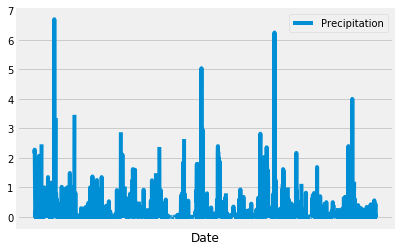

In [3]:
# Identify the last date in the database
# Convert the Date into a datetime object 
# Retrieve that date one year prior
date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
datetime_obj = datetime.strptime(date[0], "%Y-%m-%d")
yearAgo = datetime_obj - timedelta(days=365)

# Query every precipitation value one year from the last date
precip = session.query(Measurement.date, Measurement.prcp).\
                filter(Measurement.date > yearAgo).all()

# Create dataframe from query results
# Sort by date
# Set date to index
# plot the precipitation values
labels = ["Date", "Precipitation"]
precipdf = pd.DataFrame(precip, columns=labels)
precipdf = precipdf.sort_values("Date")
precipdf = precipdf.set_index("Date")
precipdf.plot(y="Precipitation")
plt.xticks([])

In [4]:
#   Pandas summary statistics for dataset

precipdf.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Station Analysis

In [5]:
# Total Number of Stations

stations = session.query(Station.station).group_by(Station.station).count()
print(f"There are currently {stations} stations with collected data.")

There are currently 9 stations with collected data.


In [6]:
# Most Active Station and all activte stations in descending order

mostActive = session.query(Measurement.station, func.count(Measurement.station)).\
                            group_by(Measurement.station).\
                            order_by(func.count(Measurement.station).desc()).all()

print(f"The most active station is currently {mostActive[0][0]} with {mostActive[0][1]} observations.")
print("")
print("Current station activity in descending order:")
counter = 1
for i in mostActive:
    print(f"{counter}:")
    print(f"Station: {i[0]}")
    print(f"Recorded Observations: {i[1]}")
    print("")
    counter += 1

The most active station is currently USC00519281 with 2772 observations.

Current station activity in descending order:
1:
Station: USC00519281
Recorded Observations: 2772

2:
Station: USC00519397
Recorded Observations: 2724

3:
Station: USC00513117
Recorded Observations: 2709

4:
Station: USC00519523
Recorded Observations: 2669

5:
Station: USC00516128
Recorded Observations: 2612

6:
Station: USC00514830
Recorded Observations: 2202

7:
Station: USC00511918
Recorded Observations: 1979

8:
Station: USC00517948
Recorded Observations: 1372

9:
Station: USC00518838
Recorded Observations: 511



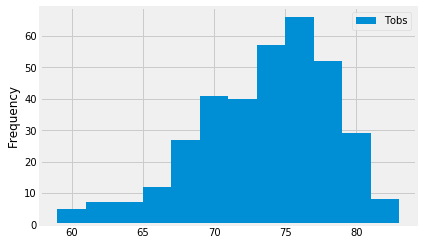

In [7]:
# 12 month temperature observations for the top observation station
temp = session.query(Measurement.tobs).\
                filter(Measurement.date > yearAgo).\
                filter(Measurement.station == mostActive[0][0]).all()

tempdf = pd.DataFrame(temp, columns=["Tobs"])

tempdf.plot(kind="hist", bins=12)